# 图像灰度化

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [3]:
def togray(src):
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

In [4]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

In [11]:
def rgb2gray_photoshop(src):
    assert len(src.shape) > 2
    rgb = np.float32(src)
    # (R^2.2 * 0.2973 + G^2.2 * 0.6274 + B^2.2 * 0.0753)^(1/2.2)
    dst = np.zeros((rgb.shape[0],rgb.shape[1]),dtype=np.float32)
    R,G,B = rgb[:,:,0],rgb[:,:,1],rgb[:,:,2]
    dst = ((R ** 2.2) * 0.2973 + (G ** 2.2) * 0.6274 + (B ** 2.2) * 0.0753) ** (1.0 / 2.2)
    dst = np.clip(dst,0,255)
    dst = np.uint8(dst)
    return dst

In [5]:
def rgb2gray_2(rgb,weights=np.c_[0.2989, 0.5870, 0.1140]):
    rgbf = np.float32(rgb)
    """
    取原始图像的RGB值的加权平均来将图片转换为灰阶，权重矩阵为tile
    """
    # 默认的 weights = array([[ 0.2989,  0.587 ,  0.114 ]])
    tile = np.tile(weights, reps=(rgbf.shape[0],rgbf.shape[1],1))
    # assert( tile.shape == im.shape )
    dst = np.sum(tile * rgbf, axis=2)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)
    # np.sum意味着沿某一轴求和，axis=2为第三维（0为第一维）
    # 整个乘法意味着由图像每个像素点的RGB 得到 (R*0.2989+ G*0.5870+ B*0.1140)灰阶值，图像的二维尺寸不变，而减为单通道。

In [ ]:
def gray2rgb(src):
    assert len(src.shape) == 2
    g = np.float32(src)
    p = 0.2989; q = 0.5870; t = 0.1140
    B_new = (g-p*R-q*G)/t
    B_new = np.uint8(B_new)
    src_new = np.zeros((src.shape)).astype("uint8")
    src_new[:,:,0] = B_new
    src_new[:,:,1] = G
    src_new[:,:,2] = R


In [6]:
gray = togray(src)

Text(0.5,1,'Gray')

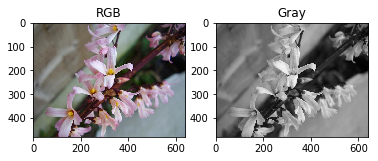

In [7]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(gray,'gray')
plt.title('Gray')

In [8]:
dst = rgb2gray(src)

Text(0.5,1,'Gray')

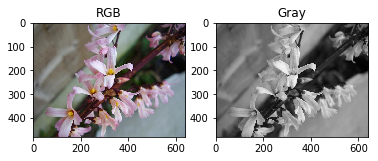

In [9]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(gray,'gray')
plt.title('Gray')

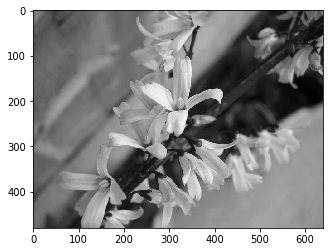

In [10]:
dst = rgb2gray_2(src)
plt.imshow(dst,'gray')

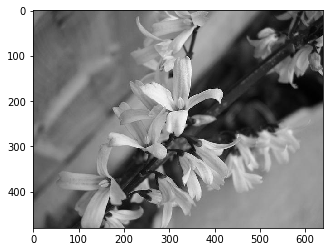

In [12]:
dst = rgb2gray_photoshop(src)
plt.imshow(dst,'gray')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/8166084

[2]. https://blog.csdn.net/llh_1178/article/details/77833447